In [60]:
#import the files 
import re 
import nltk
import ssl
import pandas as pd 
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import scipy.stats as ss
import seaborn as sns 

/Users/edmond/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
cv = CountVectorizer()
train_data_2 = pd.read_csv('training_set.csv')
test_data = pd.read_csv('testing_set.csv')

X_train = cv.fit_transform(train_data_2["Review"]).toarray()
y_train = train_data_2["Liked"].values

X_test = cv.transform(test_data["Review"]).toarray()
y_test = test_data["Liked"].values

#train the model 
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
score1 = accuracy_score(y_test,y_pred)

score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[114  21]
 [ 38 127]]


Accuracy is  80.33 %
Precision is  0.86
Recall is  0.77


In [17]:
#import the resturant data and reviews 
business = pd.read_csv("cleaned_business.csv")
reviews = pd.read_csv("cleanish_reviews.csv") 
ids = pd.read_csv('list_buiss_id.txt', sep=" ", header=None)
ids.columns = ["id"]




In [81]:
columns = ["business_id", "business_name", "our_score", "stars"]
final_results = pd.DataFrame(columns=columns)

In [82]:
for i in range(len(ids)): 
    id_curr = ids.iloc[i].id
    
    
    #Review data that matches the current business id 
    all_reviews = reviews[reviews["business_id"] == id_curr]
    
    #vectorize the reviews for that resturant 
    X_test = cv.transform(all_reviews["text"]).toarray()
    #creates the predicted sentiment for each review 
    y_pred = classifier.predict(X_test)
    #you dont have to round 
    y_pred = np.mean(y_pred)*100
    #get the row in dataframe of current buis 
    curr_buis = business.loc[business['business_id'] == id_curr]
    #modify the star ratings to the same scale 
    curr_star = (curr_buis["stars"].values[0]/5)*100
    #update the final dataframe with all the info 
    
    final_results = final_results.append({"business_id":id_curr, "business_name":curr_buis["name"].values[0],"our_score":y_pred, "stars":curr_star}, ignore_index = True)
    

In [84]:
final_results.head()

,business_id,business_name,our_score,stars
0,s2B_ZeSGTlQ3qbm0dOY5rg,Hwy 55 Burgers Shakes & Fries,39.189189,60.0
1,tYYJYqbw1zasFUCqrkawKQ,Eagles Buffet,52.777778,70.0
2,wtDLILBaj5BGEbYvWGfNUw,Duck Donuts,71.666667,80.0
3,Mnu3EPpuzu3UUN1PIwFRoQ,Maui Pasta,82.692308,90.0
4,MrSHPvHVdE_VzVN7iRz45Q,Enso Asian Bistro & Sushi Bar,51.014493,70.0


In [86]:
# Find the correlation
ss.pearsonr(final_results["our_score"], final_results["stars"])

(0.861028993493147, 1.54842004247499e-30)

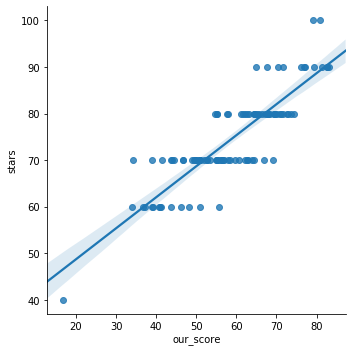

In [87]:
#visualize the correlation so we can insert into the paper 
g = sns.lmplot(x="our_score", y="stars", data=final_results)

In [88]:
final_results.filter(items=["our_score",'stars']).corr()

,our_score,stars
our_score,1.000000,0.861029
stars,0.861029,1.000000
